In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

Mean squared Error :  0.9363195267599256


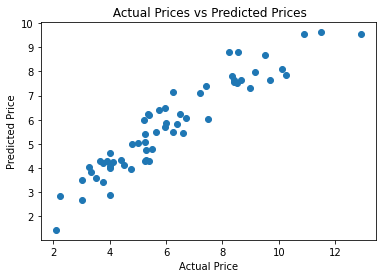

In [4]:
#Splitting the data and Target
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

#Splitting Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2,shuffle=False)
# loading the Linear regression model
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train,Y_train)

# prediction on testing data
test_data_prediction = lin_reg_model.predict(X_test)


# R squared Error
error_score = mean_squared_error(Y_test, test_data_prediction)
print("Mean squared Error : ", error_score)

#Visualize the actual prices and Predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [9]:
year=int(input("Enter the year:"))
Present_Price=input("Enter the present price of car in lakhs:")
Kms_Driven=input("Enter the Kms driven by the car:")
Fuel_type =input("Enter the fuel type of car(Diesel/Petrol/CNG:)")
Seller_type =input("Enter Seller_type(Dealer/Individual:)")
Transmission=input("Enter Transmission of the car(Automatic/Manual:)")
Owner=int(input("Enter the number of owners of the car:"))

if(Fuel_type=="Petrol"):
   Fuel_type=0
if(Fuel_type=="Diesel"):
   Fuel_type=1
if(Fuel_type=="CNG"):
   Fuel_type=2

if(Seller_type=="Dealer"):
   Seller_type=0
if(Seller_type=="Individual"):
   Seller_type=1

if(Transmission=="Manual"):
   Transmission=0
if(Transmission=="Automatic"):
   Transmission=1

testset=[]
testset.append(year)
testset.append(Present_Price)
testset.append(Kms_Driven)
testset.append(Fuel_type)
testset.append(Seller_type)
testset.append(Transmission)
testset.append(Owner)

test_val=np.array(testset).reshape(1,-1)
price_pred = lin_reg_model.predict(test_val)
print("The predicted price of the car is:",price_pred,"lakhs")


Enter the year:2014
Enter the present price of car in lakhs:5.12
Enter the Kms driven by the car:245
Enter the fuel type of car(Diesel/Petrol/CNG:)Diesel
Enter Seller_type(Dealer/Individual:)Individual
Enter Transmission of the car(Automatic/Manual:)Automatic
Enter the number of owners of the car:0
The predicted price of the car is: [5.87945502] lakhs


In [8]:
import pickle
file_name='LinearRegModel.pkl'
f = open(file_name,'wb')
pickle.dump(lin_reg_model,f)
f.close()